In [15]:
import os
import json
from typing import List, Dict

def load_json_files(directory: str) -> List[Dict]:
    """
    Loads all JSON files from the specified directory and returns a list of dictionaries
    containing the data.

    :param directory: The directory containing the JSON files.
    :return: A list of dictionaries, each representing the data from a JSON file.
    """
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                file_data = json.load(file)
                data.append(file_data)
    return data

# Example usage:
directory_path = "./data/training/"
data = load_json_files(directory_path)


In [16]:

# Printing the first element to check the structure
print(json.dumps(data[0], indent=4))

{
    "train": [
        {
            "input": [
                [
                    0,
                    0,
                    5
                ],
                [
                    0,
                    5,
                    0
                ],
                [
                    5,
                    0,
                    0
                ]
            ],
            "output": [
                [
                    3,
                    3,
                    3
                ],
                [
                    4,
                    4,
                    4
                ],
                [
                    2,
                    2,
                    2
                ]
            ]
        },
        {
            "input": [
                [
                    0,
                    0,
                    5
                ],
                [
                    0,
                    0,
                    5
                ],
               

In [17]:
puzzle = data[0]
task_grid = puzzle['test'][0]['input']
print(task_grid)

[[0, 0, 5], [5, 0, 0], [0, 5, 0]]


4, 4, 8
6, 4, 3
6, 3, 0


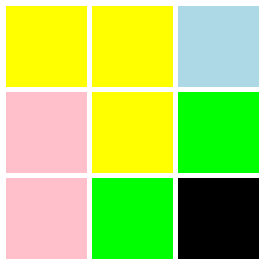

(264, 264)

In [18]:
import numpy as np
from PIL import Image, ImageDraw

# Define the color mapping
color_mapping = {
    0: (0, 0, 0),       # Black
    1: (0, 0, 255),     # Blue
    2: (255, 0, 0),     # Red
    3: (0, 255, 0),     # Green
    4: (255, 255, 0),   # Yellow
    5: (128, 128, 128), # Gray
    6: (255, 192, 203), # Pink
    7: (255, 165, 0),   # Orange
    8: (173, 216, 230), # Light Blue
    9: (128, 0, 0)      # Maroon
}

def grid_to_human_readable(grid: List[List[int]]) -> str:
    """
    Converts a grid to a human-readable, comma-separated format.
    
    :param grid: The input grid.
    :return: A string representing the grid in a human-readable format.
    """
    return "\n".join([", ".join(map(str, row)) for row in grid])

def grid_to_image(grid: List[List[int]], cell_size: int = 80, separator: int = 6) -> Image:
    """
    Converts a grid to an image using the specified color scheme and returns it as a PIL Image.
    
    :param grid: The input grid.
    :param cell_size: Size of each cell in the grid.
    :param separator: Size of the separator between cells.
    :return: A PIL Image representing the grid.
    """
    rows, cols = len(grid), len(grid[0])
    # Calculate the image size including the separators
    image_width = cols * cell_size + (cols + 1) * separator
    image_height = rows * cell_size + (rows + 1) * separator
    image = Image.new("RGB", (image_width, image_height), "white")
    draw = ImageDraw.Draw(image)

    for i in range(rows):
        for j in range(cols):
            color = color_mapping[grid[i][j]]
            top_left = (j * cell_size + (j + 1) * separator, 
                        i * cell_size + (i + 1) * separator)
            bottom_right = (top_left[0] + cell_size, top_left[1] + cell_size)
            draw.rectangle([top_left, bottom_right], fill=color)

    return image

# Example usage:
example_grid = [
    [4, 4, 8],
    [6, 4, 3],
    [6, 3, 0]
]

# Convert to human-readable format
print(grid_to_human_readable(example_grid))

# Convert to image and save
image = grid_to_image(example_grid)

# Display the image (for Jupyter notebooks)
display(image)
image.size

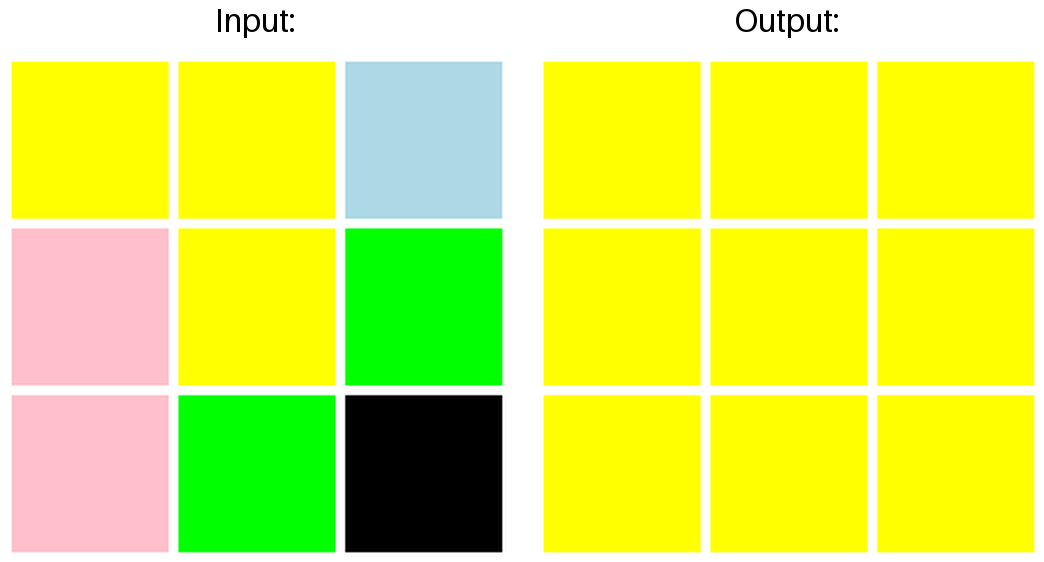

In [19]:
from PIL import Image, ImageDraw, ImageFont

def resize_image(image: Image, size: tuple = (512, 512)) -> Image:
    """
    Resizes the given image to the specified size.
    
    :param image: The input image.
    :param size: The target size as a tuple (width, height). Default is (512, 512).
    :return: The resized image.
    """
    return image.resize(size, Image.LANCZOS)

def merge_grids_with_labels(input_grid: List[List[int]], output_grid: List[List[int]]) -> Image:
    """
    Merges two grids into a single image with "Input:" and "Output:" labels above the grids.
    
    :param input_grid: The input grid.
    :param output_grid: The output grid.
    :return: A PIL Image with the merged grids and labels.
    """
    # Create images for the input and output grids
    input_image = grid_to_image(input_grid)
    output_image = grid_to_image(output_grid)
    
    # Resize images to 512x512
    input_image = resize_image(input_image)
    output_image = resize_image(output_image)
    
    # Create a new image to combine both grids with labels
    label_height = 50
    separator_width = 20
    combined_width = 2 * 512 + separator_width
    combined_height = 512 + label_height
    
    combined_image = Image.new("RGB", (combined_width, combined_height), "white")
    draw = ImageDraw.Draw(combined_image)
    
    # Load a default font
    font = ImageFont.load_default(32)
    
    # Add labels
    draw.text((512 // 2, 20), "Input:", fill="black", font=font, anchor="mm")
    draw.text((512 + separator_width + 512 // 2, 20), "Output:", fill="black", font=font, anchor="mm")
    
    # Paste the input and output images below the labels
    combined_image.paste(input_image, (0, label_height))
    combined_image.paste(output_image, (512 + separator_width, label_height))
    
    return combined_image

# Example usage:
input_grid = [
    [4, 4, 8],
    [6, 4, 3],
    [6, 3, 0]
]

output_grid = [
    [4, 4, 4],
    [4, 4, 4],
    [4, 4, 4]
]

# Merge grids with labels
merged_image = merge_grids_with_labels(input_grid, output_grid)

# Display the image (for Jupyter notebooks)
display(merged_image)

In [20]:
def create_merged_images_for_train_pairs(puzzle: Dict) -> List[Image.Image]:
    """
    Creates merged images for each train input/output pair in the puzzle.
    
    :param puzzle: The puzzle containing train input/output pairs.
    :return: A list of PIL Images with the merged input/output grids.
    """
    merged_images = []
    for pair in puzzle["train"]:
        input_grid = pair["input"]
        output_grid = pair["output"]
        merged_image = merge_grids_with_labels(input_grid, output_grid)
        merged_images.append(merged_image)
    return merged_images

def create_human_readable_text_for_train_pairs(puzzle: Dict) -> str:
    """
    Creates a human-readable text string that represents the train input/output pairs.
    
    :param puzzle: The puzzle containing train input/output pairs.
    :return: A human-readable text string.
    """
    text_representation = []
    for i, pair in enumerate(puzzle["train"], start=1):
        input_grid = pair["input"]
        output_grid = pair["output"]
        human_readable_input = grid_to_human_readable(input_grid)
        human_readable_output = grid_to_human_readable(output_grid)
        text_representation.append(
            f"Example {i}:\nInput:\n{human_readable_input}\n\nOutput:\n{human_readable_output}\n"
        )
    return "\n".join(text_representation)

Train pair 1:


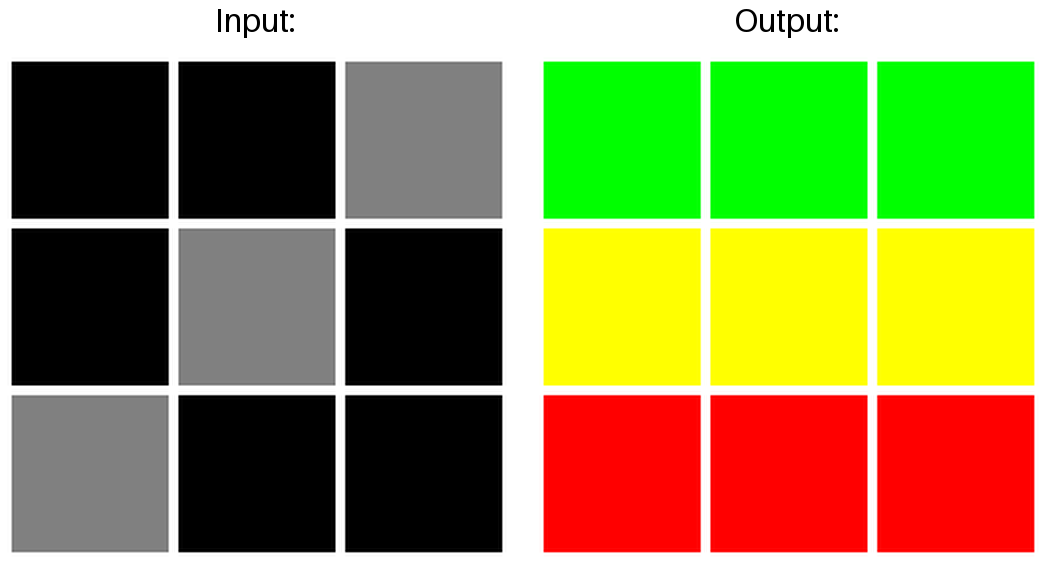

Train pair 2:


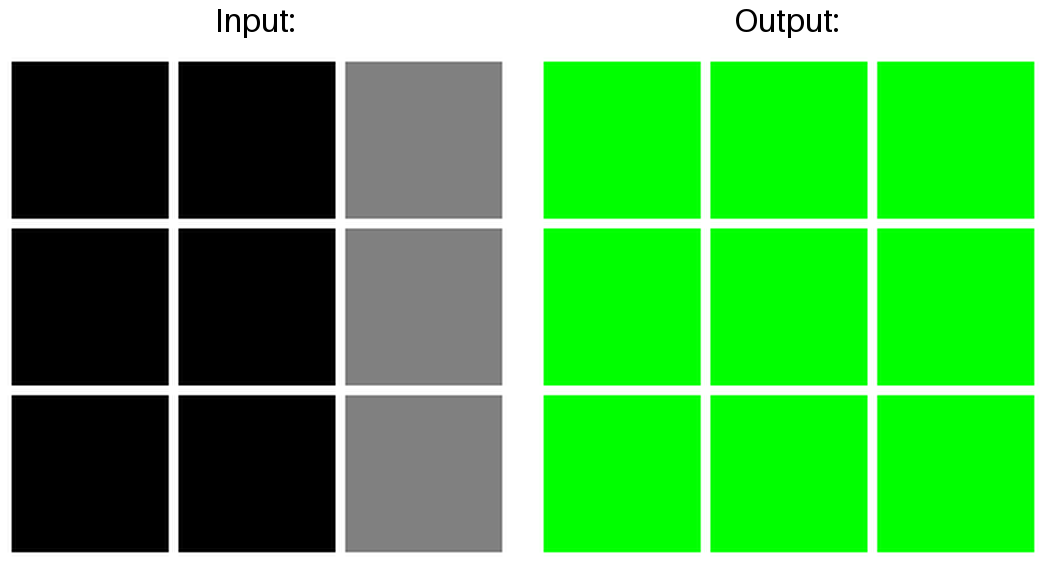

Train pair 3:


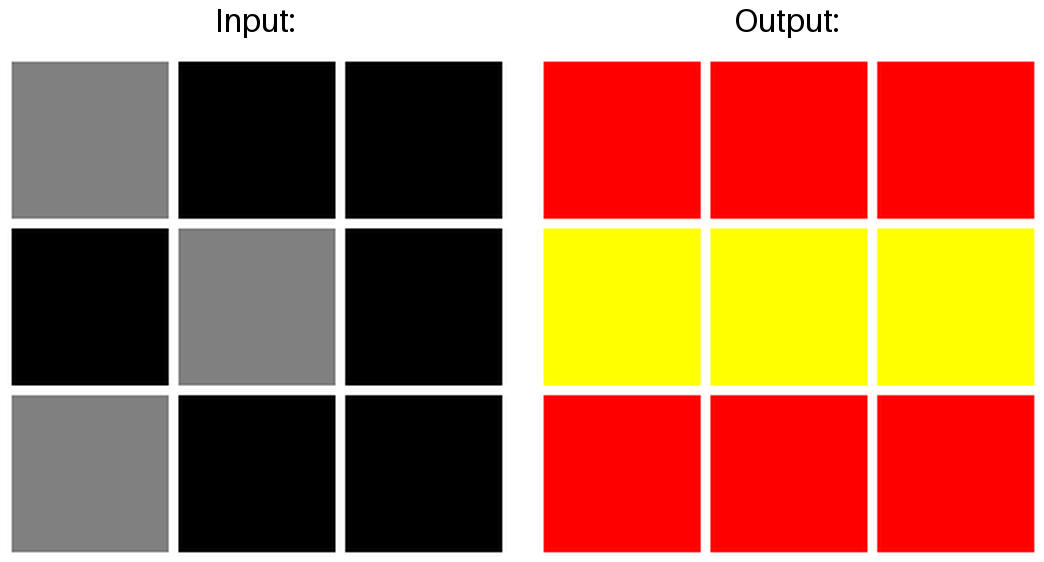

Train pair 4:


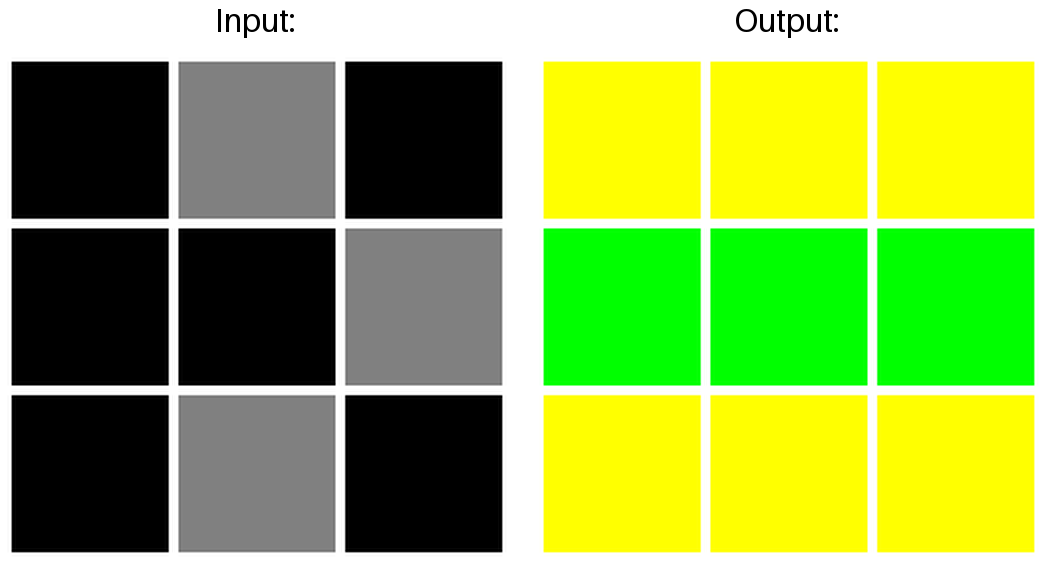

Example 1:
Input:
0, 0, 5
0, 5, 0
5, 0, 0

Output:
3, 3, 3
4, 4, 4
2, 2, 2

Example 2:
Input:
0, 0, 5
0, 0, 5
0, 0, 5

Output:
3, 3, 3
3, 3, 3
3, 3, 3

Example 3:
Input:
5, 0, 0
0, 5, 0
5, 0, 0

Output:
2, 2, 2
4, 4, 4
2, 2, 2

Example 4:
Input:
0, 5, 0
0, 0, 5
0, 5, 0

Output:
4, 4, 4
3, 3, 3
4, 4, 4



In [21]:
# Create merged images for train pairs
puzzle = data[0]
merged_images = create_merged_images_for_train_pairs(puzzle)
for idx, img in enumerate(merged_images, start=1):
    print(f"Train pair {idx}:")
    display(img)

# Create human-readable text for train pairs
human_readable_examples = create_human_readable_text_for_train_pairs(puzzle)
print(human_readable_examples)

In [22]:
import base64
import io

def get_messages(puzzle: Dict) -> List[any]:
  images = create_merged_images_for_train_pairs(puzzle)

  task_grid = puzzle['test'][0]['input']

  human_readable_examples = create_human_readable_text_for_train_pairs(puzzle)

  # I am not sure if giving the color scheme is helpful, or maybe should print with colors and abstract the numbers away completely
  prompt = f"""You are a master logician, capable of picking up complex visual patterns. You can solve any puzzle that comes your way, you are methodical and precise.
You are presented with a spacial logic puzzle as well as a series of input-output examples.
Your task is to determine the pattern that governs the transformation from the input to the output.
The same pattern/rule is applied to all the examples, when going form the input(on the left) to the output(on the right).
You have access to the examples in visual form in the images as well as in text form below.
The color schema for the colors in the grid is as follows:
Black: 0
Blue: 1
Red: 2
Green: 3
Yellow: 4
Gray: 5
Pink: 6
Orange: 7
Light Blue: 8
Maroon: 9

Your task is to determine the pattern that governs the transformation from the input to the output.
First try to understand the pattern by looking at the examples, then apply the pattern to the following input and write the output inside a code block.
Task Grid:
{grid_to_human_readable(task_grid)}

Examples:
{human_readable_examples}
"""
  
  # create messages
  image_media_type = "image/png"
  
  content = [{"type": "text", "text": prompt}]
  
  for image in images:
      # Convert PIL image to bytes
      img_byte_arr = io.BytesIO()
      image.save(img_byte_arr, format='PNG')
      img_byte_arr = img_byte_arr.getvalue()

      # Encode image bytes to base64
      image_data = base64.b64encode(img_byte_arr).decode("utf-8")

      content.append({
          "type": "image_url",
          "image_url": {
              "url": f"data:{image_media_type};base64,{image_data}",
              "detail": "high"
          }
      })

  messages = [
      {
          "role": "user",
          "content": content
      }
  ]

  return messages



In [23]:
messages = get_messages(puzzle)

[{'role': 'user', 'content': [{'type': 'text', 'text': 'You are a master logician, capable of picking up complex visual patterns. You can solve any puzzle that comes your way, you are methodical and precise.\nYou are presented with a spacial logic puzzle as well as a series of input-output examples.\nYour task is to determine the pattern that governs the transformation from the input to the output.\nThe same pattern/rule is applied to all the examples, when going form the input(on the left) to the output(on the right).\nYou have access to the examples in visual form in the images as well as in text form below.\nThe color schema for the colors in the grid is as follows:\nBlack: 0\nBlue: 1\nRed: 2\nGreen: 3\nYellow: 4\nGray: 5\nPink: 6\nOrange: 7\nLight Blue: 8\nMaroon: 9\n\nYour task is to determine the pattern that governs the transformation from the input to the output.\nFirst try to understand the pattern by looking at the examples, then apply the pattern to the following input and w
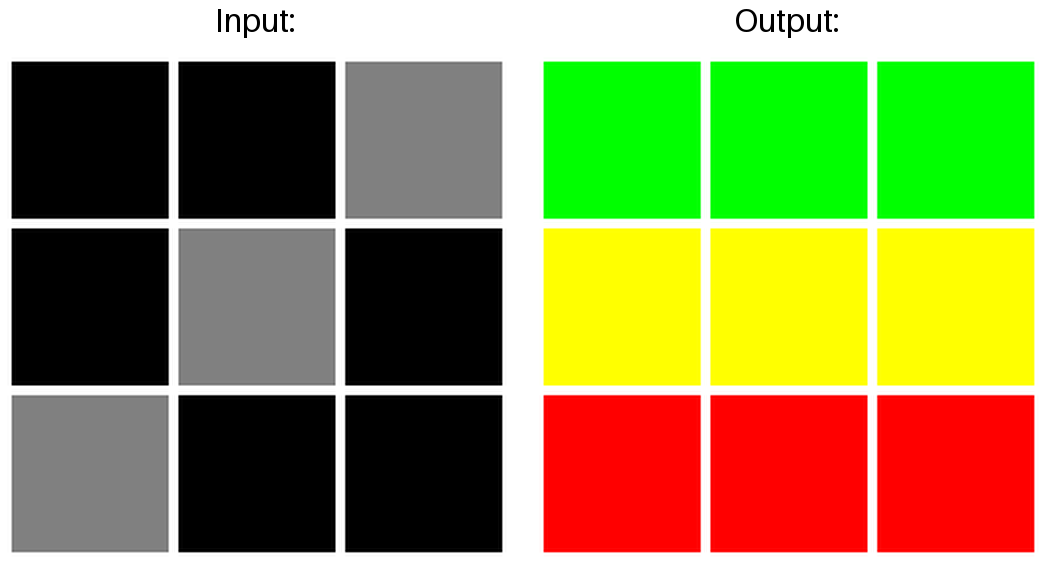
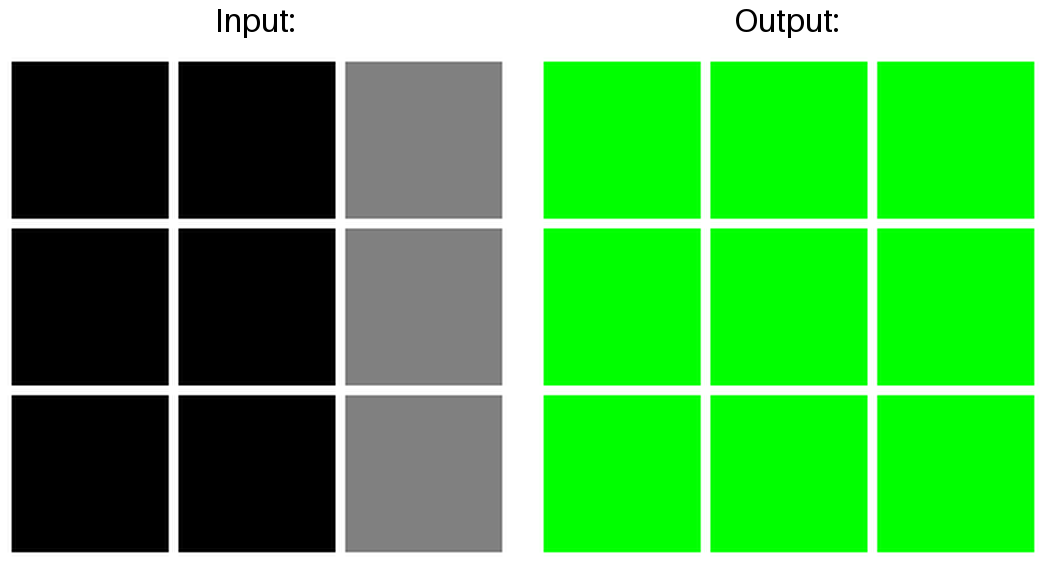
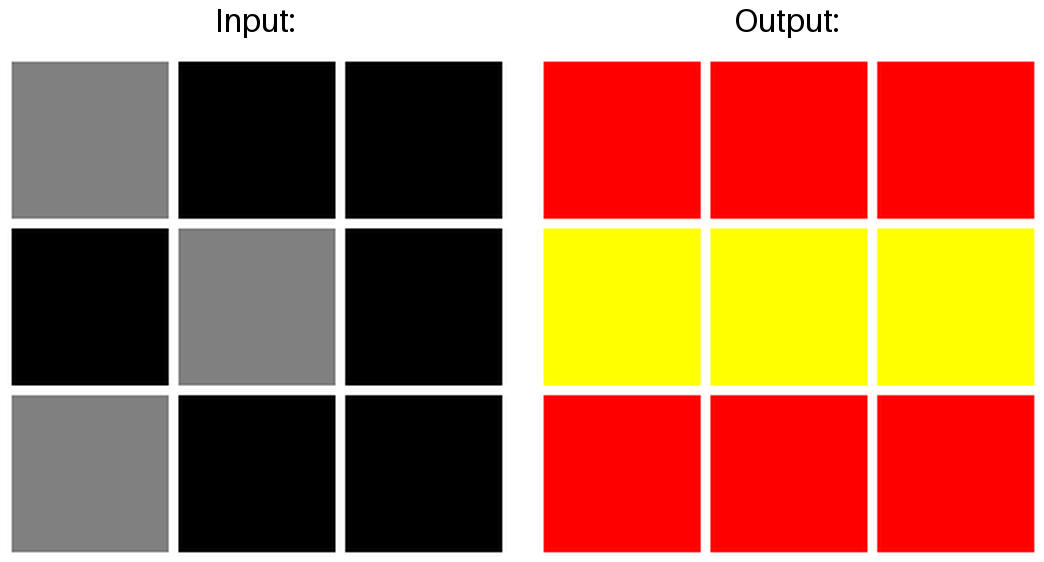
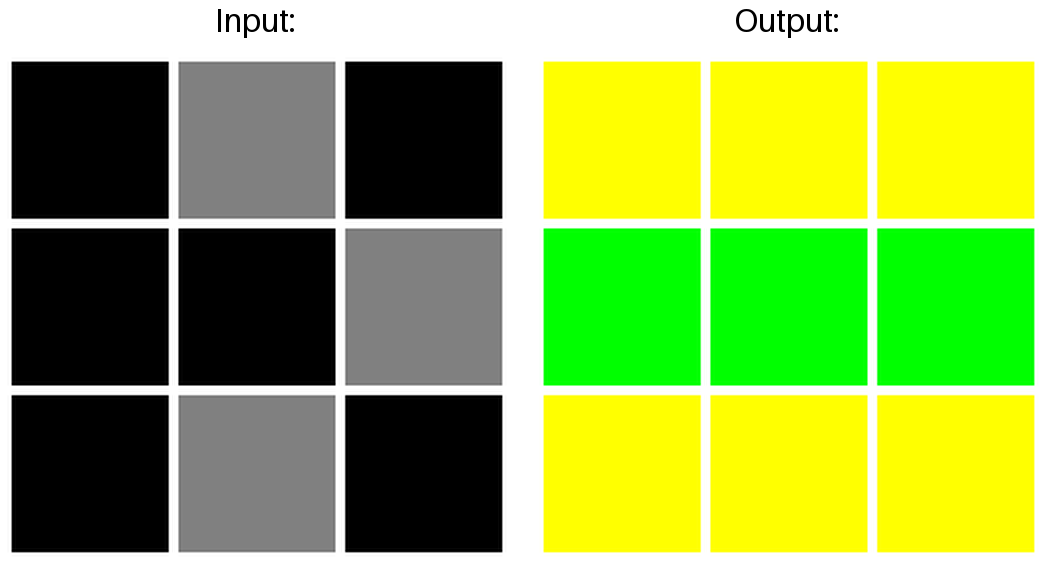

In [24]:
print(messages)

In [25]:
import openai
from my_secrets import OPENAI_API_KEY

client = openai.OpenAI(api_key=OPENAI_API_KEY)


In [26]:
response = client.chat.completions.create(
                model="gpt-4o",
                messages=messages,
                max_tokens=4096,
                temperature=0,
                timeout=180
            )

In [27]:
text = response.choices[0].message.content

print(text)

To determine the pattern governing the transformation from the input to the output, let's analyze the given examples:

### Example 1:
**Input:**
```
0, 0, 5
0, 5, 0
5, 0, 0
```
**Output:**
```
3, 3, 3
4, 4, 4
2, 2, 2
```

### Example 2:
**Input:**
```
0, 0, 5
0, 0, 5
0, 0, 5
```
**Output:**
```
3, 3, 3
3, 3, 3
3, 3, 3
```

### Example 3:
**Input:**
```
5, 0, 0
0, 5, 0
5, 0, 0
```
**Output:**
```
2, 2, 2
4, 4, 4
2, 2, 2
```

### Example 4:
**Input:**
```
0, 5, 0
0, 0, 5
0, 5, 0
```
**Output:**
```
4, 4, 4
3, 3, 3
4, 4, 4
```

### Observations:
1. The output seems to be determined by the position of the number 5 in the input grid.
2. If a row contains a 5, the corresponding row in the output grid has a specific number:
   - If the 5 is in the first row, the output row is filled with 3.
   - If the 5 is in the second row, the output row is filled with 4.
   - If the 5 is in the third row, the output row is filled with 2.

### Pattern:
- For each row in the input grid:
  - If the row conta

In [28]:
solution = puzzle['test'][0]['output']
print(grid_to_human_readable(solution))

3, 3, 3
2, 2, 2
4, 4, 4
